1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats.

In a simple linear regression model, we predict the outcome variable Y based on a linear relationship with the predictor variable X under the assumption of linear data. This relationship is described by the equation Y = β0 + β1X + ϵ where β0 is the intercept (the value of Y when X=0) and β1 is the slope (the change in Y for each unit increase in X). The term ϵ represents the error, under the assumption of being normally distributed, and that errors are homoscedastic (varience is kept constant). 

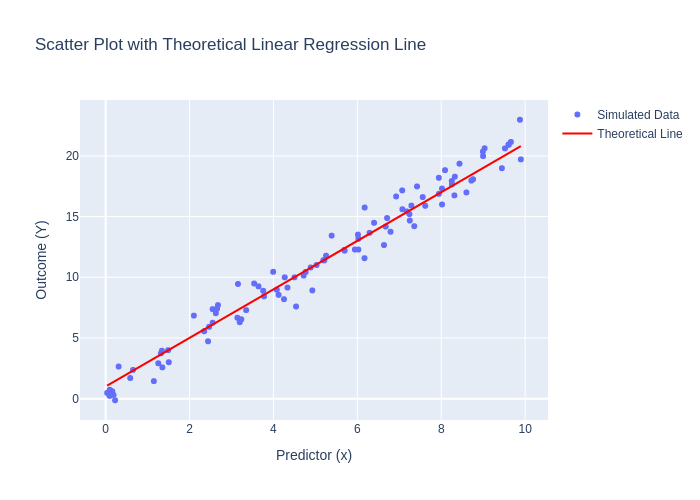

In [19]:
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go

# Parameters for the theoretical simple linear model
n = 100  # number of data points
beta_0 = 1  # intercept
beta_1 = 2  # slope
sigma = 1   # standard deviation of the error term

# Generate predictor variable (x) from a uniform distribution
x = stats.uniform.rvs(0, 10, size=n)

# Generate the error term (epsilon) from a normal distribution
epsilon = stats.norm.rvs(0, sigma, size=n)

# Theoretical model for the outcome variable (Y)
Y = beta_0 + beta_1 * x + epsilon

# Generate the theoretical line without noise
Y_line = beta_0 + beta_1 * x

# Create scatter plot with plotly.graph_objects
fig = go.Figure()

# Add scatter plot trace for the noisy data (Y)
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Simulated Data'))

# Add line trace for the theoretical linear model (Y without error)
fig.add_trace(go.Scatter(x=x, y=Y_line, mode='lines', name='Theoretical Line', line=dict(color='red')))

# Customize layout
fig.update_layout(
    title='Scatter Plot with Theoretical Linear Regression Line',
    xaxis_title='Predictor (x)',
    yaxis_title='Outcome (Y)',
    showlegend=True
)

# Display the figure
fig.show(renderer="png")


2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     3552.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           8.50e-79
Time:                        20:18:00   Log-Likelihood:                -140.89
No. Observations:                 100   AIC:                             285.8
Df Residuals:                      98   BIC:                             291.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8317      0.191      4.352      0.0

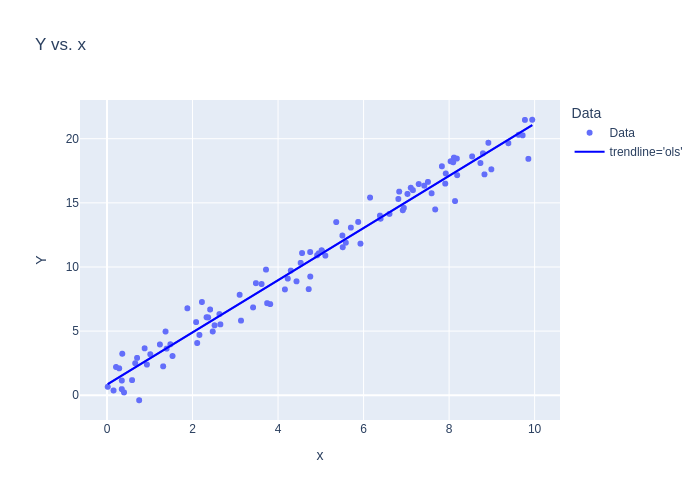

In [20]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Step 1: Simulate data from the theoretical model
n = 100  # number of data points
beta_0 = 1  # intercept
beta_1 = 2  # slope
sigma = 1   # standard deviation of the error term

# Generate predictor variable (x) from a uniform distribution
x = np.random.uniform(0, 10, size=n)

# Generate the error term (epsilon) from a normal distribution
epsilon = np.random.normal(0, sigma, size=n)

# Theoretical model for the outcome variable (Y)
Y = beta_0 + beta_1 * x + epsilon

# Step 2: Combine the simulated data into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Step 3: Fit a Simple Linear Regression Model using `statsmodels`
import statsmodels.formula.api as smf  # what is this library for?
# Answer: This library is used for specifying and estimating statistical models. It allows fitting models using a formula syntax (like R).

# Specify the model using the formula `Y ~ x`
model_data_specification = smf.ols("Y ~ x", data=df)  # what are the following two steps doing?
# Answer: This specifies a linear regression model where Y is the dependent variable and x is the independent variable.

# Fit the model
fitted_model = model_data_specification.fit()  # Answer: This fits the model to the data, estimating the intercept and slope.

# Step 4: Interpretation of the fitted model outputs
# Summary of the fitted model
print(fitted_model.summary())  # simple explanation?
# Answer: This provides a detailed statistical summary of the regression model, including estimates of coefficients, statistical significance, and goodness-of-fit measures.

# Coefficients table
print(fitted_model.summary().tables[1])  # simple explanation?
# Answer: This table contains the estimated coefficients (intercept and slope), standard errors, t-values, and p-values for the model parameters.

# Parameters (coefficients of the model)
print(fitted_model.params)  # simple explanation?
# Answer: This provides the estimated values of the intercept and slope of the regression line.

# Parameter values
print(fitted_model.params.values)  # simple explanation?
# Answer: This gives the raw values of the estimated coefficients (intercept and slope) as a NumPy array.

# R-squared value
print(fitted_model.rsquared)  # simple explanation?
# Answer: This is the R-squared value, which measures the proportion of variance in the dependent variable explained by the independent variable (goodness-of-fit measure).

# Step 5: Visualization using plotly

# Add a "Data" column to df for legend purposes
df['Data'] = 'Data'  # hack to add data to legend

# Create a scatter plot and add a trendline using `plotly.express`
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# What two things does this add onto the figure?
# Answer: It adds the scatter plot of the data points and the trendline (fitted Simple Linear Regression line).

# Plot the fitted values explicitly
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

# Display the figure
fig.show(renderer="png")


3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

The additional code added to the code from question 2 appends a dashed theoretical regression line, based on pre-defined coefficients to the plot. This line is based on the true parameters β0 and β1, which we used to generate the data. This line assumes no random noise and reflects the underlying relationship between the two variables. This is contrasted with the OLS-fitted line generated from the actual data. This line is based on the parameters estimated from the data by the linear regression model. Due to random sampling variation and the presence of noise in the data, this line will likely have a slight difference from the theoretical line. By visualizing both lines, you can see how the fitted model varies with random sampling and compare it to the true underlying relationship.

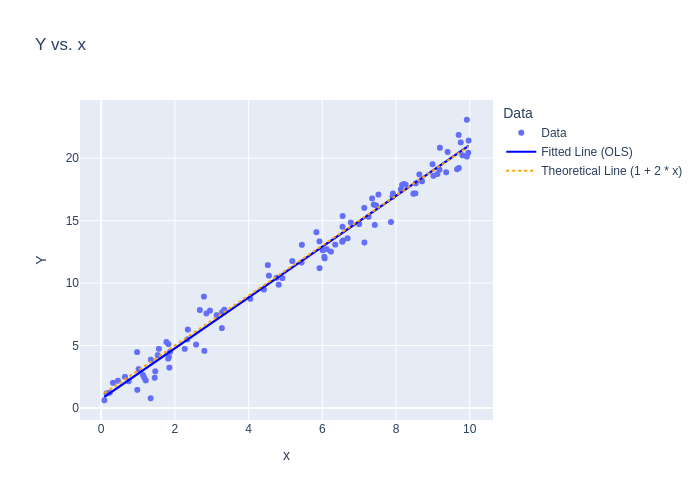

In [21]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Step 1: Simulate data from the theoretical model
n = 100  # number of data points
beta_0 = 1  # intercept of the true model
beta_1 = 2  # slope of the true model
sigma = 1   # standard deviation of the error term

# Generate predictor variable (x) from a uniform distribution
x = np.random.uniform(0, 10, size=n)

# Generate the error term (epsilon) from a normal distribution
epsilon = np.random.normal(0, sigma, size=n)

# Theoretical model for the outcome variable (Y)
Y = beta_0 + beta_1 * x + epsilon

# Step 2: Combine the simulated data into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Step 3: Fit a Simple Linear Regression Model using `statsmodels`
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Step 4: Visualization using plotly

# Add a "Data" column to df for legend purposes
df['Data'] = 'Data'

# Create a scatter plot and add a trendline using `plotly.express`
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')

# Plot the fitted values explicitly (fitted regression line)
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="Fitted Line (OLS)")

# Now add the theoretical line using the known beta_0 and beta_1
x_range = np.array([df['x'].min(), df['x'].max()])
y_theoretical = beta_0 + beta_1 * x_range

fig.add_scatter(x=x_range, y=y_theoretical, mode='lines',
                name=f"Theoretical Line ({beta_0} + {beta_1} * x)", 
                line=dict(dash='dot', color='orange'))

# Display the figure
fig.show(renderer="png")


Chatbot Session: https://chatgpt.com/share/672911c7-7938-8009-8d21-7c99cdd3732a


In this conversation, we explored key concepts related to simple linear regression and implemented code to simulate, fit, and visualize regression models using Python libraries like numpy, pandas, statsmodels, and plotly.

- Theoretical Simple Linear Regression: We described the components of a simple linear regression model, including the predictor variable, outcome variable, slope, intercept, and error term. 
- Simulating Data: We generated a dataset of x values from a uniform distribution and created corresponding Y values using the linear equation with added random noise drawn from a normal distribution.
- Fitting a Model: We used statsmodels to fit an ordinary least squares (OLS) regression model to the simulated data, obtaining estimates for the intercept and slope.
- Visualizing the Fitted Line and Theoretical Line: We created a scatter plot of the data using plotly.express, added the fitted regression line (blue), and overlaid the theoretical line (orange, dotted) to compare the two. The fitted line reflects the estimates from noisy data, while the theoretical line shows the exact relationship based on known parameters.
- Difference Between the Lines: The fitted line differs slightly from the theoretical line due to random sampling variation—the presence of noise in real data. This difference highlights the impact of noise when estimating relationships from data.
This conversation provided both a theoretical understanding and practical implementation of simple linear regression, demonstrating how to simulate, fit, and compare regression models.

4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

fitted_model.fittedvalues are the predicted values of the outcome variable Y for each observation in the dataset, calculated using the fitted coefficients from the Simple Linear Regression model. These coefficients, stored in fitted_model.params, include the estimated intercept β0 and slope β1, which are derived from minimizing the error between observed and predicted values during the fitting process. The coefficients for each variable and the intercept are found by running fitted_model.summary().tables[1]. These coefficients are used to generate the fitted values by plugging them into the regression equation along with the values of the independent variables from your dataset. The predicted values are computed using the equation Y = β0 + β1Xi, where x i is the predictor variable for the i-th observation. This results in in-sample predictions, which represent the best estimates of Y based on the linear relationship identified in the data. These fitted values will vary depending on the specific sample data and the estimated coefficients, in contrast to the theoretical model where the coefficients beta zero and beta one are assumed to be known constants. The fitted values align closely with the true data points but will deviate slightly due to the random variation noise present in the data.

5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

The fitted model is determined using the ordinary least squares (OLS) method, which selects the line that minimizes the sum of the squared differences (residuals) between the observed Y values and the predicted values generated by the model (fitted_model.fittedvalues). The use of "squares" is essential because squaring the residuals prevents positive and negative errors from canceling each other out and emphasizes larger errors, thus ensuring that the model focuses on minimizing the most significant deviations. This approach results in the best linear fit that represents the relationship between the predictor variable x and the outcome variable Y, which can be visualized through the trendline added in the scatter plot with trendline='ols'. The fitted line effectively summarizes the underlying data patterns, allowing for better predictions and insights into the relationship being modeled.

6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

The first expression represents the proportion of the total variation in the outcome variable Y that is explained by the fitted model, where the numerator measures the unexplained variation (residual sum of squares) and the denominator measures the total variation in Y. This is equivalent to fitted_model.rsquared, which quantifies the accuracy of the model by indicating how well the fitted values approximate the actual data; an R^2 value closer to 1 signifies a better model fit. Furthermore, the last two expressions capture the squared correlation coefficients, which reflect the strength and direction of the linear relationship between Y and the fitted values (predictions) as well as Y and the predictor variable x. The last expression simply shows the square of the Pearson coefficient r which makes it equivalent to the first two expressions. In the context of Simple Linear Regression, both correlations provide insight into how much of the variation in Y can be accounted for by the model(3) and the predictor(4), respectively.

Chatbot Session: https://chatgpt.com/share/672a8761-b530-8009-a8fe-7aa2fd7c1320

Here’s a summary of our conversation without formulas or symbols:

- Proportion of Variation Explained by the Model:
We discussed how expressions like the ratio of squared differences between observed and predicted values to the total squared differences from the mean of the observed values measure the proportion of variance in the dependent variable explained by the regression model. This is known as R-squared (R²), which quantifies how well the model explains the variability in the dependent variable.
- Correlation Coefficient Squared:
The two expressions using np.corrcoef calculate the proportion of variance explained, but the first one focuses on the relationship between the actual values and the predicted values from the model. The second one measures the direct relationship between the independent variable and the dependent variable.
- Formula for R²:
We derived the formula for R², explaining how the total variation in the data is divided into explained variation and unexplained variation. The R-squared value represents the proportion of the total variation that the model explains, and it can also be related to the correlation coefficient squared in simple linear regression.
Relationship Between fitted_model.fittedvalues and Model Coefficients:
- We explored how the fitted values (fitted_model.fittedvalues) are derived from the estimated coefficients (fitted_model.params). The coefficients from the model summary are applied to the input values of the independent variables to generate the predicted values for the dependent variable.
This covers how regression models measure and explain the relationship between variables, the importance of R-squared in evaluating model fit, and the process by which fitted values are derived from the model's coefficients.

7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

The assumptions of the simple linear regression model are linearily, the error is normally distributed and errors are homoscedastic meaning the varience is kept constant. These assumptions to not seem compatible with the data below. It looks as though the data could be better modeled with an exponential function as opposed to a line. Next, homoscedasticty states that the variance of the residuals (errors) should be constant across all levels of the independent variable. The variability in Y changes with different levels of fertilizer application, suggesting heteroscedasticity (non-constant variance). This could indicate that the model's predictions are more uncertain at certain ranges of x. In addition, the error is not normally dsitributed but instead seems to have a right skew as demonstrates by the histogram of residuals below. 

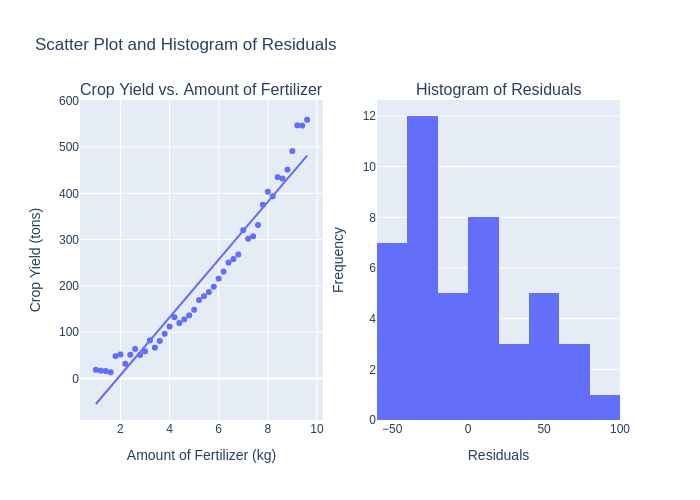

In [22]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

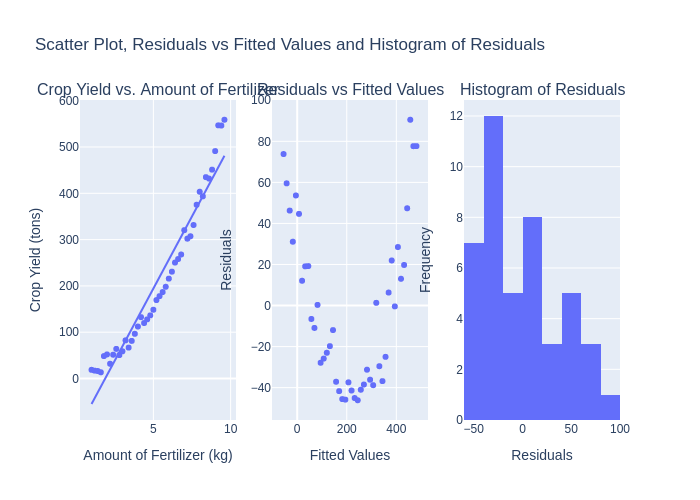

In [23]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])

# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals

# Create figure for Scatter Plot and Residuals vs Fitted values
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

fig2 = px.scatter(df, x=y_hat, y='Residuals', 
                  title='Residuals vs Fitted Values', labels={'x': 'Fitted Values', 'y': 'Residuals'})

# Create Histogram of Residuals
fig3 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

# Combine the plots
fig = make_subplots(rows=1, cols=3, 
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Residuals vs Fitted Values', 
                                    'Histogram of Residuals'))

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
for trace in fig3.data:
    fig.add_trace(trace, row=1, col=3)

fig.update_layout(title='Scatter Plot, Residuals vs Fitted Values and Histogram of Residuals',
                  xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
                  xaxis2_title='Fitted Values', yaxis2_title='Residuals', 
                  xaxis3_title='Residuals', yaxis3_title='Frequency', showlegend=False)

fig.show(renderer="png")  # USE fig.show(renderer="png") FOR ALL GitHub and MarkUs SUBMISSIONS


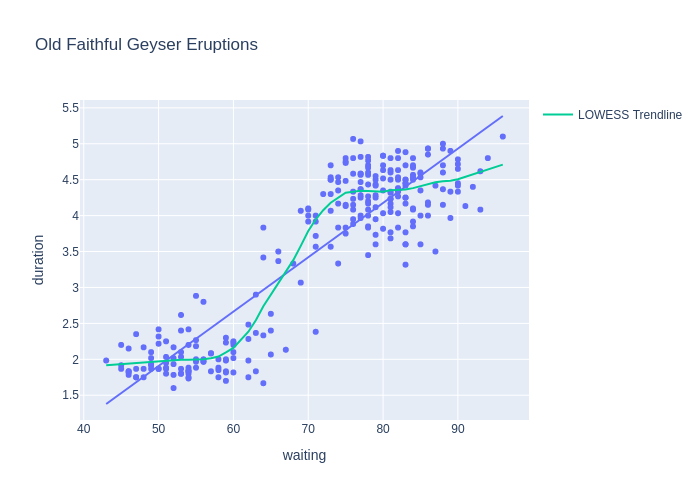

In [24]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

The null hypothesis of no linear association on average can be represented by the parameter β1 (slope of fitted line) being equal to 0. This would mean that under the null hypothesis, there is no statistically significant relationship between the two variables. Because the p-value in the table is under 0.001, this provides very strong evidence agianst the null hypothesis. 

In [7]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        18:09:24   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


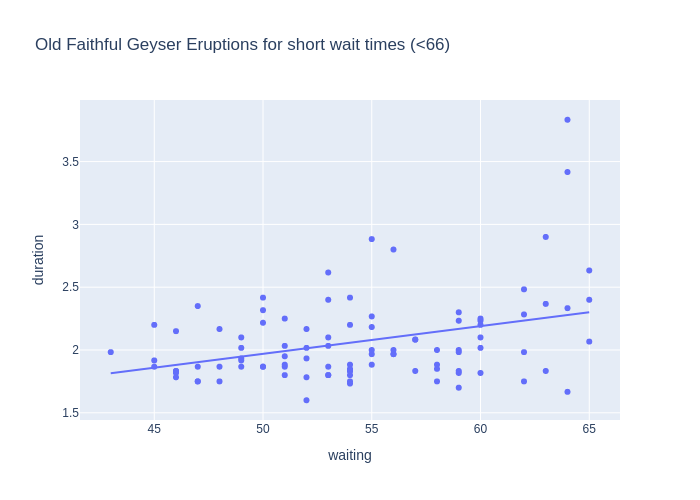

In [25]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The null hypothesis of no linear association on average can be represented by the parameter β1 (slope of fitted line) being equal to 0. This would mean that under the null hypothesis, there is no statistically significant relationship between the two variables. Within the context of only short wait times, depending on how the interval of "short" is defined, the strength of the evidence against the null hypothesis changes. For the graph of short wait times under 62, p-value is 0.238 which is grater than 0.1, indicating no evidence against the null hypothesis. For wait times under 64, the p-value is 0.036, indicating moderate evidence against the null hypothesis. Finally, for wait times under 66, the p-value is 0.000, indicating strong evidence against the null hypothesis. Therefore as the interval of the restricted dataset changes, so does the strength against the null hypothesis, indicating a change in the relationship between the two varaibles "on average."

10. Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


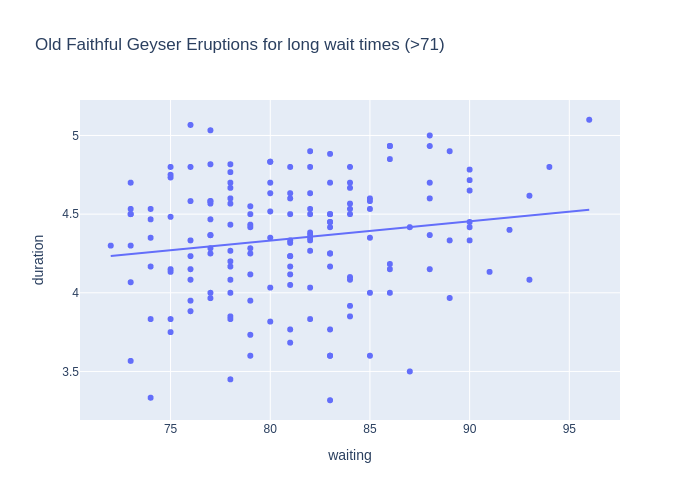

In [26]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for long wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


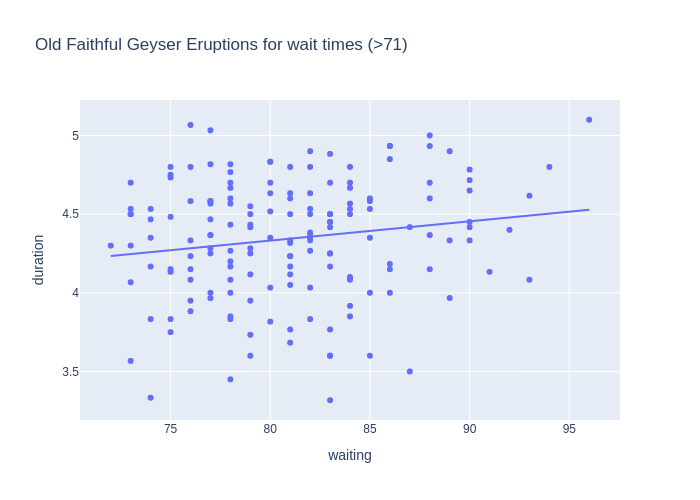

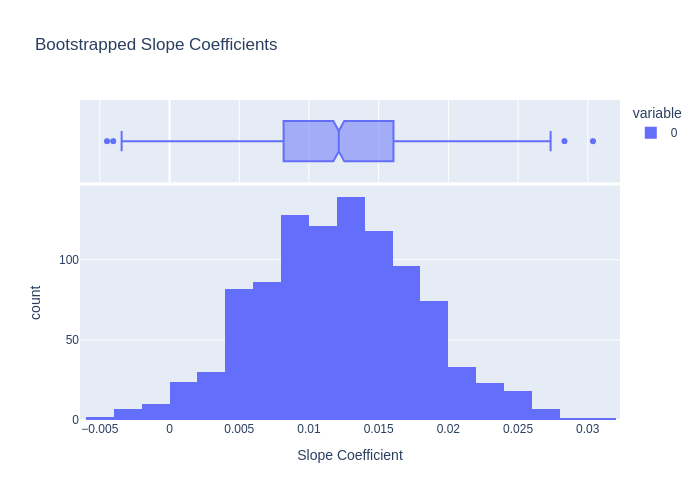

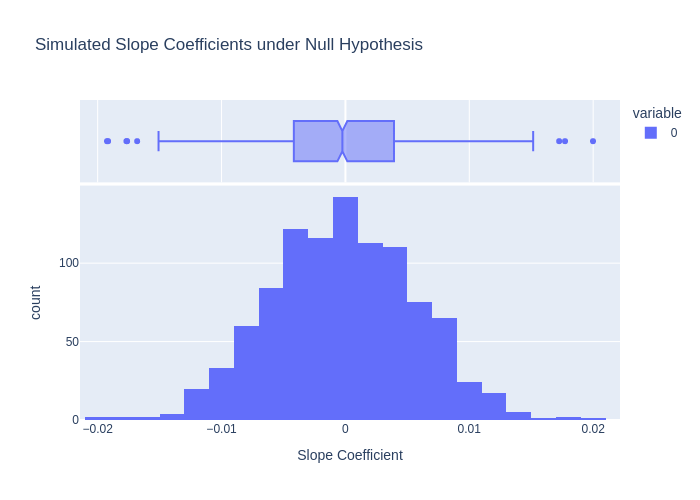

95% Bootstrap Confidence Interval for Slope: [0.0009333636764781231, 0.024066727336247592]
Does the 95% confidence interval contain 0? No
Simulated p-value: 0.029
OLS p-value: 0.038135755338567744


In [27]:
import plotly.express as px
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

# Set the threshold for long wait times
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit

# Fit the OLS model for the long wait data
ols_model = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit()
print(ols_model.summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png")  # USE fig.show(renderer="png") FOR ALL GitHub and MarkUs SUBMISSIONS

# Bootstrap step
n_bootstrap = 1000  # Number of bootstrap samples
n = len(old_faithful[long_wait])  # Sample size

# Store bootstrap slope coefficients
bootstrap_slopes = []

# Perform bootstrap resampling and linear regression
for _ in range(n_bootstrap):
    bootstrap_sample = old_faithful[long_wait].sample(n=n, replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrap_slopes.append(model.params['waiting'])

# Visualize the bootstrapped slope coefficients
fig1 = px.histogram(bootstrap_slopes, nbins=30, title="Bootstrapped Slope Coefficients",
                    labels={'value': 'Slope Coefficient'}, marginal='box')
fig1.show(renderer="png")

# Step 2: Simulate under the null hypothesis (Beta0=1.65, Beta1=0, std=0.37)

np.random.seed(42)  # For reproducibility
beta0 = 1.65
beta1 = 0
std = 0.37

# Generate simulated Y values under null hypothesis
X_sim = old_faithful[long_wait]['waiting'].values
Y_sim = beta0 + beta1 * X_sim + np.random.normal(0, std, size=n)

# Fit regression models for simulated data and store slopes
simulated_slopes = []

for _ in range(n_bootstrap):
    sim_Y_sample = beta0 + beta1 * X_sim + np.random.normal(0, std, size=n)
    sim_data = pd.DataFrame({'waiting': X_sim, 'duration': sim_Y_sample})
    sim_model = smf.ols('duration ~ waiting', data=sim_data).fit()
    simulated_slopes.append(sim_model.params['waiting'])

# Visualize the simulated slope coefficients under the null hypothesis
fig2 = px.histogram(simulated_slopes, nbins=30, title="Simulated Slope Coefficients under Null Hypothesis",
                    labels={'value': 'Slope Coefficient'}, marginal='box')
fig2.show(renderer="png")

# Step 3: Compute 95% bootstrapped confidence interval and check if 0 is included
lower_bound = np.percentile(bootstrap_slopes, 2.5)
upper_bound = np.percentile(bootstrap_slopes, 97.5)
contains_zero = lower_bound <= 0 <= upper_bound

print(f"95% Bootstrap Confidence Interval for Slope: [{lower_bound}, {upper_bound}]")
print(f"Does the 95% confidence interval contain 0? {'Yes' if contains_zero else 'No'}")

# Step 4: Compare simulated p-value with the OLS model's p-value

# Simulated p-value: proportion of simulated slopes as extreme as the actual observed slope
observed_slope = ols_model.params['waiting']
simulated_p_value = np.mean(np.abs(simulated_slopes) >= np.abs(observed_slope))

# Actual OLS p-value
ols_p_value = ols_model.pvalues['waiting']

print(f"Simulated p-value: {simulated_p_value}")
print(f"OLS p-value: {ols_p_value}")


ChatBot Session: https://chatgpt.com/share/672bf4b1-f660-8009-9c2b-27fddd3b463a

In this conversation, we discussed analyzing the relationship between waiting time and eruption duration in the Old Faithful Geyser dataset, specifically focusing on long wait times (greater than 71 minutes).

The goal was to:

- Bootstrap the slope coefficients of linear regression models using 1000 resamples to collect and visualize their sampling distribution.
- Simulate samples under the null hypothesis (assuming no linear relationship between waiting and duration) to collect and visualize the slope distribution under this assumption.
- Compute a 95% confidence interval for the bootstrapped slopes and check if 0 lies within this interval.
- Compare the simulated p-value from the null hypothesis with the p-value obtained from the OLS regression.
We reviewed the steps required, the implementation in Python using libraries like pandas, statsmodels, and plotly, and checked how to visualize the results and draw statistical conclusions about the relationship between waiting and duration in the context of long wait times.

11. Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length where we use ki (rather than xi) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications and report the evidence against a null hypothesis of "no difference between groups "on average") for the new indicator variable based model.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


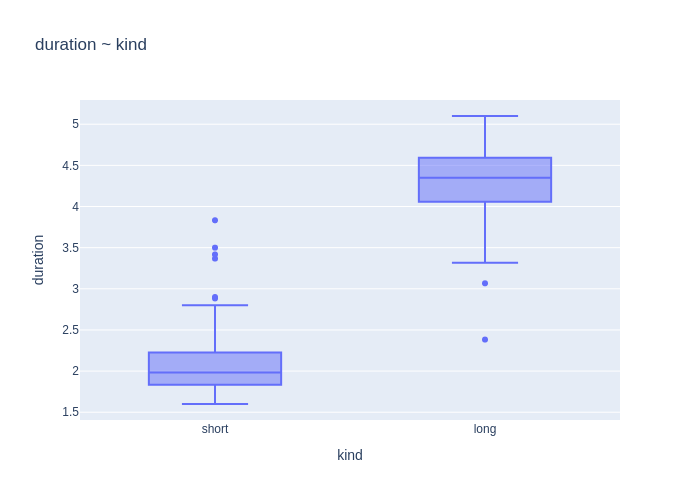

In [28]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The null hypothesis of there being no difference in the eruption duration between "short" and "long" wait times "on average" can be represented by the parameter β1 (slope of fitted line between the data from the two categories) being equal to 0. This would mean that under the null hypothesis, there is no statistically significant relationship between the wait time being "short" versus "long" when compared to the duration. There is strong evidence against the null hypothesis because the p-value is 0.000 which is less than 0.001. This evidence would signify that there is in fact a statistically significant relationship between the the categories of waiting time and the duration. 

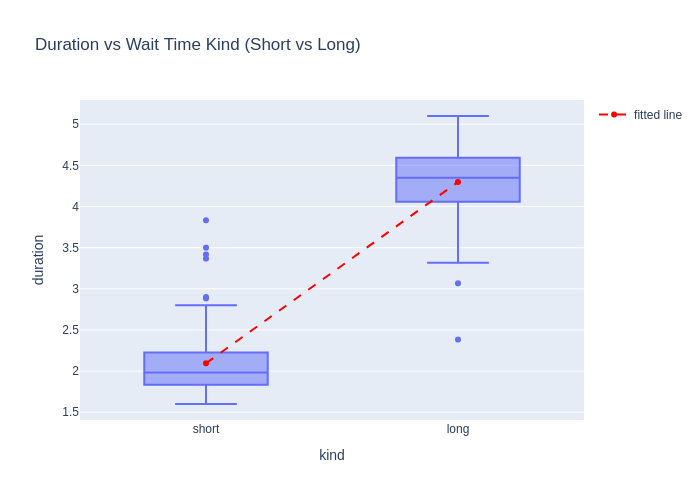

In [29]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Assuming 'old_faithful' is your dataset
# and 'kind' is the categorical variable ('short', 'long')
# Box plot showing the eruption duration by wait kind
fig = px.box(old_faithful, x='kind', y='duration', 
             title='Duration vs Wait Time Kind (Short vs Long)', 
             category_orders={'kind': ['short', 'long']})

# Calculate means for each kind ('short' and 'long')
means = old_faithful.groupby('kind')['duration'].mean()

# Add a line connecting the means between the two groups
fig.add_trace(go.Scatter(x=['short', 'long'], 
                         y=[means['short'], means['long']],
                         mode='lines+markers',
                         line=dict(color='red', dash='dash'),
                         name='fitted line'))

# Show the plot
fig.show(renderer="png")


12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

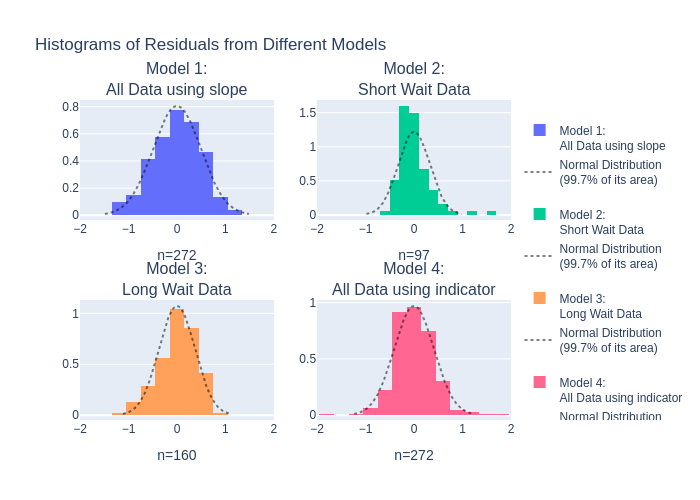

In [30]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS


The histogram for Model 1 (All Data using slope) best supports the assumption that the distribution of error terms is normal, as it shows a reasonably symmetric bell shape centered around zero with a good fit to the overlaid normal distribution curve. The other three models—Model 2 (Short Wait Data), Model 3 (Long Wait Data), and Model 4 (All Data using indicator)—do not support normality due to visible skewness, asymmetry, and potential multimodal patterns, indicating deviations from the normal distribution assumption.

13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations.

In the permutation test, the approach involves shuffling the labels (short and long groups) to simulate the distribution of the test statistic under the null hypothesis that there is no difference in means. This process generates a reference distribution of mean differences due to chance. In the bootstrap method, resampling is done within each group (with replacement) to create a distribution of mean differences. This allows you to estimate the variability of the sample means and construct a confidence interval for the true difference in means.
The permutation test and bootstrap method are non-parametric, relying on resampling to compare the group means without making assumptions about the underlying data distribution. In contrast, the indicator variable model from Question 11 is a parametric approach that assumes a linear relationship between the indicator variable and the response, estimating the difference between group means through regression. The indicator model offers a direct estimate using a fitted equation, while the resampling methods provide inference through empirical distributions of resampled data. Both approaches assess group differences, but the resampling methods are more flexible and assumption-free.

ChatBot Session: https://chatgpt.com/share/672d1fb2-1a30-8009-82d4-d11311826188

Summary:

Here's a summary of our conversation:

Line of Best Fit Code:
You wanted to modify your code to create a line of best fit in the context of duration vs. "kind" (short or long) for Old Faithful eruption data.
I provided an edited version of your code, which fits an OLS model, predicts values, and overlays a line of best fit for each group ('short' and 'long') on the box plot using plotly.
Permutation Test and Bootstrap Confidence Interval:
You were exploring two sampling-based methods for comparing the means of "short" and "long" wait times:
(A) Permutation test: Involves shuffling the group labels to generate a null distribution of differences in means and calculating a p-value.
(B) Bootstrap confidence interval: Involves resampling with replacement within each group to compute a 95% confidence interval for the difference in means.
I explained how both methods work:
The permutation test checks if the observed difference is significant by comparing it to a distribution generated by shuffling labels.
The bootstrap method provides a confidence interval by resampling data within each group and applying quantiles to the mean differences.
Comparison with Indicator Variable-Based Model:
I compared the permutation and bootstrap methods with the indicator variable-based model (from a previous question you mentioned):
Similarities: All three methods test the difference in means between two groups.
Differences: The permutation and bootstrap are non-parametric and based on randomization, while the indicator variable model uses a parametric, linear approach with stronger assumptions (e.g., normality, linearity).
The conversation clarified the differences between randomization-based and parametric approaches for comparing group means, with a focus on hypothesis testing and confidence intervals.


14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes.